# Basit Lineer Regresyon:

$$ y = \beta_0 + \beta_1X + \epsilon $$

In [86]:
# importlarımızı yapıyoruz

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [87]:
# Excel dosyasının yolu
dosya_yolu = r"C:\Users\yusuf\OneDrive\Masaüstü\Laptop_Price_Prediction\cleaned_data.xlsx"

# Dosya yolunun var olup olmadığını kontrol et
if os.path.exists(dosya_yolu):
    print("Dosya mevcut!")
    # Dosyayı oku
    df_ = pd.read_excel(dosya_yolu)
    df = df_.copy()
else:
    print("Dosya yolu yanlış veya dosya mevcut değil.")


Dosya mevcut!


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ekran_Boyutu         1200 non-null   object 
 1   Ekran_Karti          1200 non-null   object 
 2   GPU_Bellek_Tipi      1200 non-null   object 
 3   GPU_Gucu             1200 non-null   int64  
 4   GPU_Hafizasi         1200 non-null   int64  
 5   GPU_Tipi             1200 non-null   object 
 6   Yenileme_Hizi        1200 non-null   int64  
 7   Max_CPU_Hizi_GHz     1200 non-null   float64
 8   Panel_Tipi           1200 non-null   object 
 9   RAM                  1200 non-null   int64  
 10  RAM_Tipi             1200 non-null   object 
 11  Renk                 1200 non-null   object 
 12  SSD_Kapasitesi       1200 non-null   int64  
 13  CPU_Cekirdek_Sayisi  1200 non-null   int64  
 14  Isletim_Sistemi      1200 non-null   object 
 15  Islemci              1200 non-null   o

In [89]:
# df.describe() çıktısını tablo formatında gösterme
desc = df.describe()

# Jupyter Notebook ortamında tabloyu düzgün şekilde göstermek için display kullanabilirsiniz
from IPython.display import display
display(desc)
desc.to_csv('describe_output.csv')



,GPU_Gucu,GPU_Hafizasi,Yenileme_Hizi,Max_CPU_Hizi_GHz,RAM,SSD_Kapasitesi,CPU_Cekirdek_Sayisi
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,106.145833,7.150000,160.507500,4.724250,30.793333,1063.820000,12.559167
std,16.301974,2.633745,38.395487,0.208822,22.997928,938.071427,6.011374
min,45.000000,4.000000,60.000000,4.200000,8.000000,256.000000,1.000000
25%,106.000000,6.000000,144.000000,4.700000,16.000000,512.000000,8.000000
50%,106.000000,6.000000,144.000000,4.700000,24.000000,1024.000000,12.000000
75%,106.000000,8.000000,165.000000,4.900000,32.000000,1024.000000,16.000000
max,175.000000,16.000000,360.000000,5.000000,128.000000,8192.000000,24.000000


In [90]:
data = df[["SSD_Kapasitesi","Fiyat"]]

X = data["SSD_Kapasitesi"]

y = data["Fiyat"]

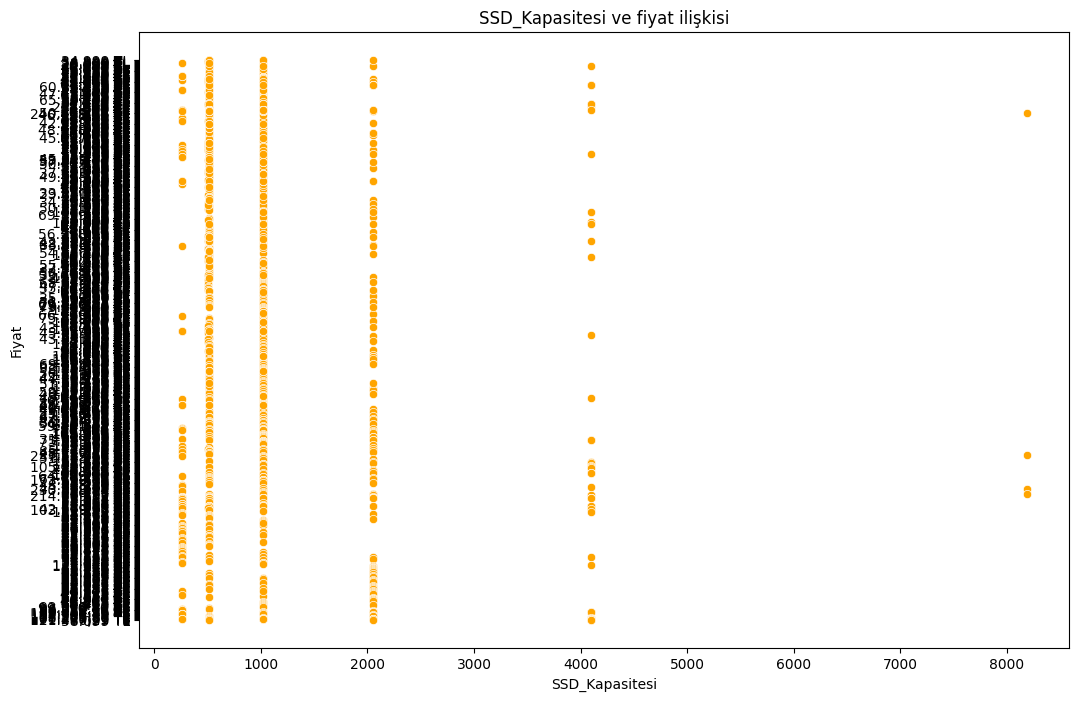

In [91]:
plt.figure(figsize=(12,8))

sns.scatterplot(data=data,x="SSD_Kapasitesi",y="Fiyat",color= "orange")

plt.title("SSD_Kapasitesi ve fiyat ilişkisi")
plt.show()

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()

In [94]:
print("x in boyutu:",X.shape)
print("x in boyutu:",y.shape)

x in boyutu: (1200,)
x in boyutu: (1200,)


In [95]:
# lineer regression 2 boyutlu olması gerek o yüzden tekrardan boyutlandırdık
X = X.values.reshape(-1,1)

In [96]:
print("x in boyutu:",X.shape)

x in boyutu: (1200, 1)


In [97]:
y = y.values.reshape(-1,1)

In [98]:
print("x in boyutu:",y.shape)

x in boyutu: (1200, 1)


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [101]:
print("X_train şekli:",X_train.shape)
print("X_test şekli:",X_test.shape)
print("y_train şekli:",y_train.shape)
print("y_test şekli:",y_test.shape)

X_train şekli: (840, 1)
X_test şekli: (360, 1)
y_train şekli: (840, 1)
y_test şekli: (360, 1)


In [102]:
type(X_train)

numpy.ndarray

In [103]:
import numpy as np

# NaN değerlerini say
nan_count = np.isnan(y_train).sum()
print(f"Number of NaN values in y_train: {nan_count}")

# NaN olan değerlerin yerlerini göster
nan_indices = np.where(np.isnan(y_train))
print(f"Indices of NaN values: {nan_indices}")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
print(y_train)

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
# B0
print(lr.intercept_)

In [ ]:
# B1
print(lr.coef_)

In [60]:
# y = B0 + B1X
# y = 33.95 + 0.57X

In [61]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
# gerçek data -> Grand Truth
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(X_test, y_test, label = "Grand Truth", color = "red")

# Tahmin -> Prediction

ax.scatter(X_test, y_pred, label = "Prediction", color = "green" )





plt.title("CPU_Cekirdek_Sayisi ve fiyat tahmin")
plt.xlabel("CPU_Cekirdek_Sayisi")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test[0:10]

In [ ]:
y_pred[0:10]

In [ ]:
indexler = range(1,361)

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test, label = "Grand Truth", color = "red", linewidth = 2)


ax.plot(indexler, y_pred, label = "Prediction", color = "green", linewidth = 2)



plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Hatalar
indexler = range(1,361)
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(indexler, y_test - y_pred, label = "Grand Truth", color = "red", linewidth = 2)

ax.plot(indexler,np.zeros(360),color="black" )

plt.title("Gerçek - Prediction")
plt.xlabel("Data Index")
plt.ylabel("fiyat")
plt.legend(loc="upper left")
plt.show()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
from sklearn.impute import SimpleImputer


# Now calculate r2_score on the imputed data
rtwo = r2_score(y_test, y_pred)
print(f"R^2 score: {rtwo}")
print(f"R^2 score (%): {rtwo*100}")

In [71]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print(mse)

In [73]:
import math
rmse = math.sqrt(mse)

In [ ]:
print(rmse)